<a href="https://colab.research.google.com/github/AnnMarie9/Qm206-Ann-/blob/main/Taller_3_superficie_de_respuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taller 3: Superficie de respuesta
Nombre: Ann Pinto  Cédula: 4-821-1964

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import plotly.graph_objects as go
import pandas as pd

In [2]:
# Datos proporcionados
x1 = np.array([6, 5.5, 4.5, 4, 4.5, 5.5, 5, 5])
x2 = np.array([0.3, 0.387, 0.387, 0.3, 0.213, 0.213, 0.3, 0.3])
yexp = np.array([5.67, 7.44, 7.33, 6.33, 7.11, 7.22, 6.33, 6.66])

In [3]:
# Transformación de variables x1, x2 ==> -0.5 a 0.5
x1 = (x1 - x1.min()) / (x1.max() - x1.min()) - 0.5
x2 = (x2 - x2.min()) / (x2.max() - x2.min()) - 0.5

In [4]:
# Definición de la función objetivo
def objetivo(beta, x1, x2):
    return np.sum((beta[0] + beta[1]*x1 + beta[2]*x2 - yexp)**2)

In [5]:
# Estimación de los parámetros beta
res = minimize(objetivo, [0, 0, 0], args=(x1, x2))

In [7]:
# Superficie de respuesta en 3D
x1_vals = np.linspace(-0.5, 0.5, 100)
x2_vals = np.linspace(-0.5, 0.5, 100)
x1_vals, x2_vals = np.meshgrid(x1_vals, x2_vals)
y_pred = res.x[0] + res.x[1]*x1_vals + res.x[2]*x2_vals

In [8]:
fig = go.Figure(data=[go.Surface(z=y_pred, x=x1_vals, y=x2_vals)])
fig.update_layout(scene=dict(zaxis=dict(range=[yexp.min(), yexp.max()])))
fig.show()

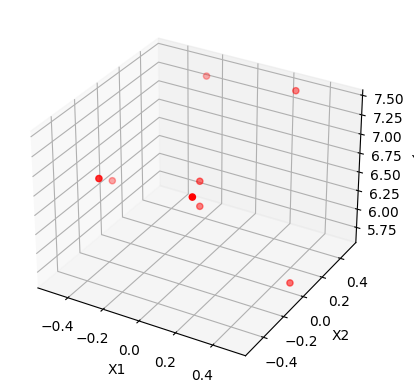

In [11]:
# Gráfica de dispersión 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, yexp, c='r', marker='o')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import plotly.graph_objects as go

In [19]:
# Datos proporcionados
x1 = np.array([6, 5.5, 4.5, 4, 4.5, 5.5, 5, 5])
x2 = np.array([0.3, 0.387, 0.387, 0.3, 0.213, 0.213, 0.3, 0.3])
yexp = np.array([5.67, 7.44, 7.33, 6.33, 7.11, 7.22, 6.33, 6.66])

In [20]:
# Transformación de variables x1, x2 ==> -0.5 a 0.5
x1 = (x1 - x1.min()) / (x1.max() - x1.min()) - 0.5
x2 = (x2 - x2.min()) / (x2.max() - x2.min()) - 0.5

In [14]:
# Definición de la función objetivo cuadrática
def objetivo(beta, x1, x2):
    return np.sum((beta[0] + beta[1]*x1 + beta[2]*x2 + beta[3]*x1**2 + beta[4]*x2**2 - yexp)**2)


In [15]:
# Estimación de los parámetros beta
res = minimize(objetivo, [0, 0, 0, 0, 0], args=(x1, x2))

In [16]:
# Superficie de respuesta en 3D
x1_vals = np.linspace(-0.5, 0.5, 100)
x2_vals = np.linspace(-0.5, 0.5, 100)
x1_vals, x2_vals = np.meshgrid(x1_vals, x2_vals)
y_pred = res.x[0] + res.x[1]*x1_vals + res.x[2]*x2_vals + res.x[3]*x1_vals**2 + res.x[4]*x2_vals**2
fig = go.Figure(data=[go.Surface(z=y_pred, x=x1_vals, y=x2_vals)])
fig.update_layout(scene=dict(zaxis=dict(range=[yexp.min(), yexp.max()])))
fig.show()